In [1]:
from time import time

import torch
import sklearn.datasets
import sklearn.preprocessing
import sklearn.model_selection
import numpy as np
import math

from OnlineHD import onlinehd

In [2]:
def load():
    # fetches data
    x, y = sklearn.datasets.fetch_openml('mnist_784', return_X_y=True)
    x = x.astype(np.float)
    y = y.astype(np.int)
    y = np.array(y)

    # split and normalize
    x, x_test, y, y_test = sklearn.model_selection.train_test_split(x, y)
    scaler = sklearn.preprocessing.Normalizer().fit(x)
    x = scaler.transform(x)
    x_test = scaler.transform(x_test)

    # changes data to pytorch's tensors
    x = torch.from_numpy(x).float()
    y = torch.from_numpy(y).long()
    x_test = torch.from_numpy(x_test).float()
    y_test = torch.from_numpy(y_test).long()

    return x, x_test, y, y_test

In [3]:
# simple OnlineHD training

print('Loading...')
x, x_test, y, y_test = load()
classes = y.unique().size(0)
features = x.size(1)

Loading...


In [4]:
model = onlinehd.OnlineHD(classes, features, dim=10000)

if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x_test = x_test.cuda()
    y_test = y_test.cuda()
    model = model.to('cuda')
    print('Using GPU!')

print('Training...')
t = time()
model = model.fit(x, y, bootstrap=1.0, lr=0.035, epochs=200)
t = time() - t

Training...


# just encoding with out sin, cos

- torch.matmul(x[i:i+bsize], self.basis.T, out=self.temp)
- torch.add(self.temp, self.base, out=self.h[i:i+bsize])

In [5]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.839924
acc_test = 0.838571
t = 23.339410


# encoding with sin

- torch.matmul(x[i:i+bsize], self.basis.T, out=self.temp)
- torch.add(self.temp, self.base, out=self.h[i:i+bsize])
- self.h[i:i+bsize].sin_()

In [5]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.908610
acc_test = 0.905200
t = 21.149395


## 100 epochs

In [7]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.957505
acc_test = 0.944057
t = 68.286493


## 150 epochs

In [10]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.970914
acc_test = 0.951943
t = 97.238024


# encoding with cos

- torch.matmul(x[i:i+bsize], self.basis.T, out=self.temp)
- torch.add(self.temp, self.base, out=self.h[i:i+bsize])
- self.h[i:i+bsize].cos_()

## epoch 50

In [5]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.910286
acc_test = 0.905943
t = 20.964919


# Custom for arcos

- self.basis = torch.randn(self.dim, self.features).abs()
- self.base = torch.empty(self.dim).uniform_(0.0, math.pi)
- self.h = torch.empty(n, self.dim, device=x.device, dtype=x.dtype)
- self.temp = torch.empty(bsize, self.dim, device=x.device, dtype=x.dtype)

- for i in range(0, n, bsize):
-     torch.matmul(x[i:i+bsize], self.basis.T, out=self.temp)
-     torch.add(self.temp, self.base, out=self.h[i:i+bsize])
-     self.h[i:i+bsize].div_(4.1) # it must be defined before traning.
-     self.h[i:i+bsize].cos_()

## epoch 20

In [9]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.860362
acc_test = 0.849886
t = 34.522982


## epcoh 150

In [6]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.792648
acc_test = 0.791657
t = 153.539439


## epoch 200

In [5]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.913162
acc_test = 0.900514
t = 145.710842


## epoch 300

In [9]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.846800
acc_test = 0.846114
t = 254.502384


## epoch 450

In [11]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.865981
acc_test = 0.861029
t = 342.440542


## epoch 600

In [11]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.924590
acc_test = 0.907886
t = 384.815178


## epoch 1000

In [5]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.896152
acc_test = 0.885771
t = 3410.355678


# encoding with sin, sin

- torch.matmul(x[i:i+bsize], self.basis.T, out=self.temp)
- torch.add(self.temp, self.base, out=self.h[i:i+bsize])
- self.h[i:i+bsize].sin_().mul(self.basis.T.sin())

In [7]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.908476
acc_test = 0.906857
t = 21.425649


# basis = [1 or -1]

- torch.matmul(x[i:i+bsize], self.basis.T, out=self.h)
- torch.add(self.temp, self.base, out=self.h[i:i+bsize])
- self.h[i:i+bsize].sin_()

In [5]:
print('Validating...')
yhat = model(x)
yhat_test = model(x_test)
acc = (y == yhat).float().mean()
acc_test = (y_test == yhat_test).float().mean()
print(f'{acc = :6f}')
print(f'{acc_test = :6f}')
print(f'{t = :6f}')

Validating...
acc = 0.469829
acc_test = 0.100971
t = 30.199594


# OnlineHD Decoding

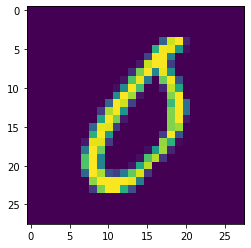

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x[0].reshape(28, 28))

In [6]:
tmp = model.encoder.h
tmp, tmp.shape

(tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.2324,  0.0728,  0.0153,  ..., -0.0460, -0.1298, -0.0590],
         [ 0.4327,  0.3144,  0.2409,  ...,  0.1491,  0.2705,  0.0642],
         ...,
         [-0.2961, -0.4015, -0.5289,  ..., -0.6887, -0.6807, -0.5911],
         [-0.1025, -0.0728, -0.3217,  ..., -0.4935, -0.4110, -0.3597],
         [ 0.2106,  0.0630,  0.0731,  ..., -0.0150, -0.0043, -0.1954]]),
 torch.Size([52501, 10000]))

In [7]:
pred_x = model.encoder.decode(tmp[:100])

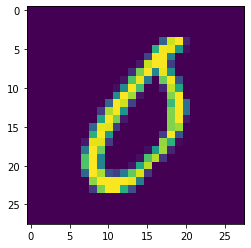

In [8]:
plt.imshow(x[0].reshape(28, 28))

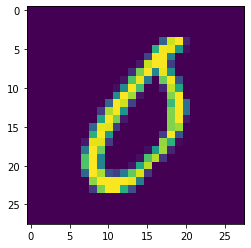

In [9]:
plt.imshow(pred_x[1].reshape(28, 28))

# model save

In [10]:
import pickle

with open("model.pickle","wb") as fw:
    pickle.dump(model, fw)

with open("model.pickle","rb") as fr:
    model2 = pickle.load(fr)

In [154]:
dim = 10000
features = 784

temp = torch.empty(dim)
basis = torch.randn(dim, features).abs()
base = torch.empty(dim).uniform_(0.0, math.pi)

temp.shape, basis.shape, base.shape

(torch.Size([10000]), torch.Size([10000, 784]), torch.Size([10000]))

In [155]:
h = torch.empty(10000)

torch.matmul(x[0], basis.T, out=temp)

tensor([8.4819, 8.1416, 8.3155,  ..., 9.0979, 7.9487, 8.6541])

In [156]:
temp

tensor([8.4819, 8.1416, 8.3155,  ..., 9.0979, 7.9487, 8.6541])

In [157]:
torch.add(temp, base, out=h)

tensor([ 8.8152,  8.6640,  9.5346,  ..., 11.0123, 10.3979, 10.2911])

In [163]:
h = h / 4.1

In [168]:
h

tensor([2.1501, 2.1132, 2.3255,  ..., 2.6859, 2.5361, 2.5100])

In [166]:
h_cos = h.cos()
h_cos

tensor([-0.5474, -0.5162, -0.6851,  ..., -0.8980, -0.8222, -0.8071])

# ====

In [167]:
hv_acos = h_cos.acos()
hv_acos

tensor([2.1501, 2.1132, 2.3255,  ..., 2.6859, 2.5361, 2.5100])

In [173]:
hv_acos = hv_acos * 4.1
hv_acos

tensor([ 8.8152,  8.6640,  9.5346,  ..., 11.0123, 10.3979, 10.2911])

In [174]:
temp2 = torch.empty((10000))

torch.sub(hv_acos, base, out=temp2)

tensor([8.4819, 8.1416, 8.3155,  ..., 9.0979, 7.9487, 8.6541])

In [175]:
basis_pinv = torch.linalg.pinv(basis.T)

In [177]:
temp2.shape, basis_pinv.shape

(torch.Size([10000]), torch.Size([10000, 784]))

In [ ]:
pred_x = torch.empty(784)

torch.matmul(temp2, basis_pinv, out=pred_x)

In [179]:
(x[0] - pred_x).sum()

tensor(4.0602e-05)

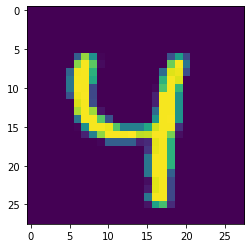

In [180]:
plt.imshow(pred_x.reshape(28, 28))

In [12]:
basis = torch.randn(10000, 784).abs()

basis

tensor([[0.7114, 1.3170, 1.4563,  ..., 0.3586, 0.2731, 1.3327],
        [0.7656, 0.4675, 0.7524,  ..., 2.1739, 0.4012, 0.2318],
        [1.0540, 0.8967, 0.7146,  ..., 0.2114, 0.0147, 1.2611],
        ...,
        [0.0239, 1.5551, 0.2591,  ..., 0.3044, 0.0511, 0.7065],
        [0.5777, 0.0253, 1.8322,  ..., 0.3553, 1.5805, 0.2475],
        [1.0863, 1.7801, 0.2875,  ..., 0.5571, 0.9171, 1.7728]])

In [13]:
base = torch.empty(10000).uniform_(0.0, math.pi)
base

tensor([0.4703, 2.5656, 0.5210,  ..., 0.7679, 2.0780, 0.0580])

In [21]:
(torch.matmul(x, basis.T) + base).max().item()/math.pi + 0.001

6.157951691030861

In [16]:
16.7819/math.pi

5.341844678947757

In [10]:
tmp = torch.rand(10, 10)
tmp

tensor([[0.4246, 0.3563, 0.0297, 0.9904, 0.2632, 0.2293, 0.5206, 0.7305, 0.5530,
         0.1143],
        [0.3848, 0.2216, 0.8937, 0.2115, 0.9521, 0.6114, 0.7111, 0.7009, 0.6841,
         0.8221],
        [0.6712, 0.4776, 0.9902, 0.0260, 0.4583, 0.9965, 0.4047, 0.8552, 0.7770,
         0.9412],
        [0.5624, 0.7522, 0.0833, 0.2359, 0.3893, 0.4400, 0.1440, 0.1848, 0.0917,
         0.3806],
        [0.7882, 0.0590, 0.5497, 0.7605, 0.3700, 0.7556, 0.8402, 0.7242, 0.0042,
         0.4250],
        [0.9573, 0.4832, 0.7780, 0.1770, 0.0594, 0.6736, 0.5315, 0.5354, 0.6202,
         0.6447],
        [0.1284, 0.3170, 0.3245, 0.5051, 0.8604, 0.6495, 0.4574, 0.9562, 0.7039,
         0.9979],
        [0.1974, 0.2303, 0.0979, 0.4515, 0.8187, 0.4110, 0.8674, 0.2181, 0.1816,
         0.8026],
        [0.1625, 0.6732, 0.4455, 0.5105, 0.3469, 0.2356, 0.6420, 0.1094, 0.0709,
         0.6756],
        [0.0218, 0.3869, 0.7704, 0.1387, 0.9666, 0.2166, 0.4646, 0.9431, 0.0013,
         0.0389]])

In [13]:
tmp2 = torch.rand(1, 10)

In [16]:
torch.cat((tmp, tmp2), 0).shape

torch.Size([11, 10])

In [18]:
torch.empty(1, 1)

tensor([[0.]])